# Evaluation & Diagnostics

In [8]:
# Imports + load data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [9]:
preds = pd.read_csv("../data/processed/model_predictions.csv")
metrics = pd.read_csv("../data/processed/model_metrics.csv")

In [10]:
metrics

,Model,MAE,RMSE,R²
0,Linear Regression,99272.353488,137304.756770,0.741726
1,Random Forest,58033.208879,102825.751292,0.855152


**Interpretation**

The Random Forest model outperforms Linear Regression across all three metrics:

- It has a lower MAE, meaning smaller average errors.

- It has a lower RMSE, meaning fewer extreme mistakes.

- It has a higher R², meaning it explains more variation in sales.

**Conclusion:** Based on quantitative performance alone, Random Forest is the preferred model for this forecasting task, though it still exhibits systematic underprediction and high-volume uncertainty.

In [11]:
metrics.to_csv("../reports/model_metrics_summary.csv", index=False)

### Actual vs Predicted (Visual Diagnostic)

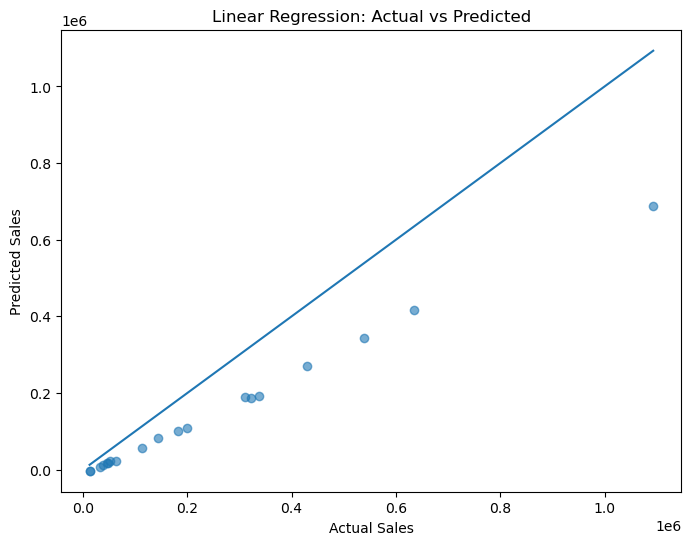

In [12]:
# Linear Regression

plt.figure(figsize=(8,6))
plt.scatter(preds["Actual Sales"], preds["LR_Predicted"], alpha=0.6)
plt.plot(
    [preds["Actual Sales"].min(), preds["Actual Sales"].max()],
    [preds["Actual Sales"].min(), preds["Actual Sales"].max()],
)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression: Actual vs Predicted")

plt.savefig("../figures/charts/lr_actual_vs_predicted.png", dpi=300, bbox_inches="tight")
plt.show()


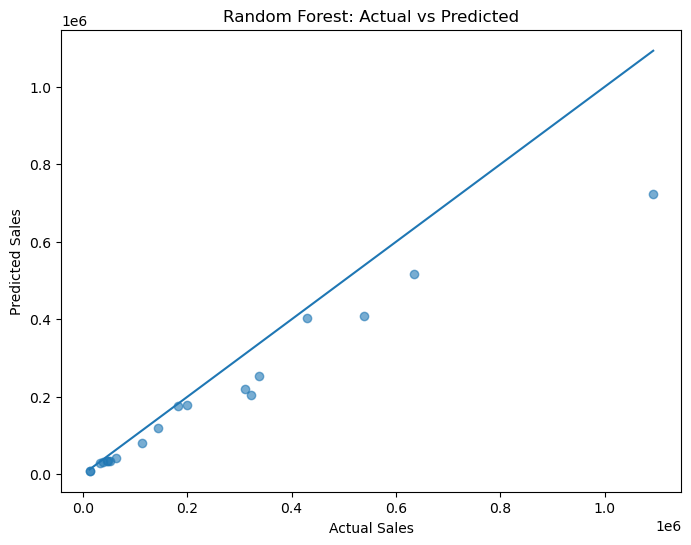

In [13]:
# Random Forest

plt.figure(figsize=(8,6))
plt.scatter(preds["Actual Sales"], preds["RF_Predicted"], alpha=0.6)
plt.plot(
    [preds["Actual Sales"].min(), preds["Actual Sales"].max()],
    [preds["Actual Sales"].min(), preds["Actual Sales"].max()],
)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Random Forest: Actual vs Predicted")

plt.savefig("../figures/charts/rf_actual_vs_predicted.png", dpi=300, bbox_inches="tight")
plt.show()

**📌 What this shows**

Comparing the “Actual vs. Predicted” plots reveals clear performance differences between the Linear Regression and Random Forest models.

First, in terms of distance from the diagonal (which represents prediction error), the Linear Regression model shows much larger deviations, particularly at higher sales values. This indicates higher overall error and poor performance when sales increase. In contrast, the Random Forest model’s predictions remain closer to the diagonal across most values, reflecting stronger accuracy.

Second, regarding spread and stability, the Random Forest model exhibits a tighter clustering of points around the ideal line, especially for low-to-mid sales ranges. This suggests more consistent and stable predictions. The Linear Regression model, by comparison, shows a wider and more uneven spread, indicating instability and weaker generalization.

Finally, in terms of bias patterns, both models tend to underpredict (points that fall below the diagonal), but this bias is far more pronounced and systematic in the Linear Regression model. The Random Forest model handles lower sales volumes more effectively and only begins to show noticeable underprediction at higher sales levels.

**Conclusion:** Random Forest is clearly superior in accuracy, stability, and bias behavior, particularly for practical business forecasting.

In [14]:
# Let's look at the Residual Analysis for both models

preds["LR_Residuals"] = preds["Actual Sales"] - preds["LR_Predicted"]
preds["RF_Residuals"] = preds["Actual Sales"] - preds["RF_Predicted"]

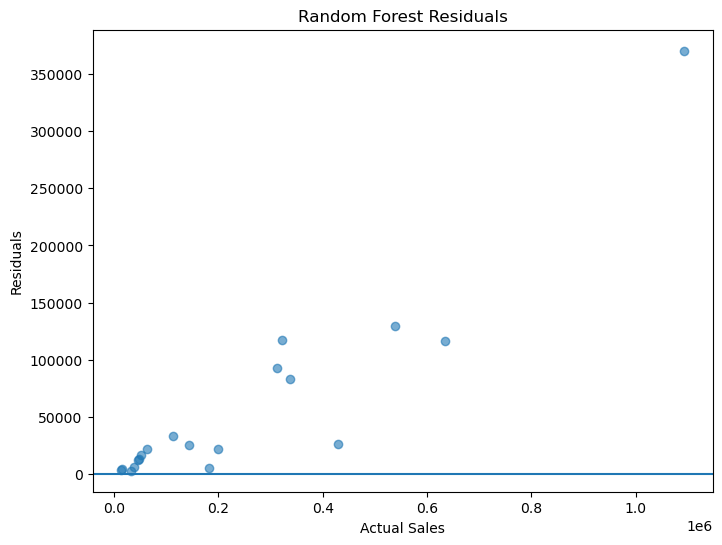

In [15]:
# Residual plot for random forest

plt.figure(figsize=(8,6))
plt.scatter(preds["Actual Sales"], preds["RF_Residuals"], alpha=0.6)
plt.axhline(0)
plt.xlabel("Actual Sales")
plt.ylabel("Residuals")
plt.title("Random Forest Residuals")

plt.savefig("../figures/charts/rf_residuals.png", dpi=300, bbox_inches="tight")
plt.show()


**📌 Interpretation**

The residual plot for the Random Forest model reveals a non-random pattern, indicating that the model still contains bias.

In a well-fit model, residuals should be randomly scattered around the zero line. However, here most residuals are positive, meaning the model consistently underpredicts sales. This confirms a systematic bias rather than random error.

Additionally, the vertical spread increases sharply at higher sales values, this indicates growing uncertainty and reduced reliability when forecasting large sales volumes, which is especially critical because these high-sales periods often drive the majority of business revenue.

**Conclusion:** While Random Forest performs better than Linear Regression, it still underestimates high-volume sales and becomes less reliable at scale.

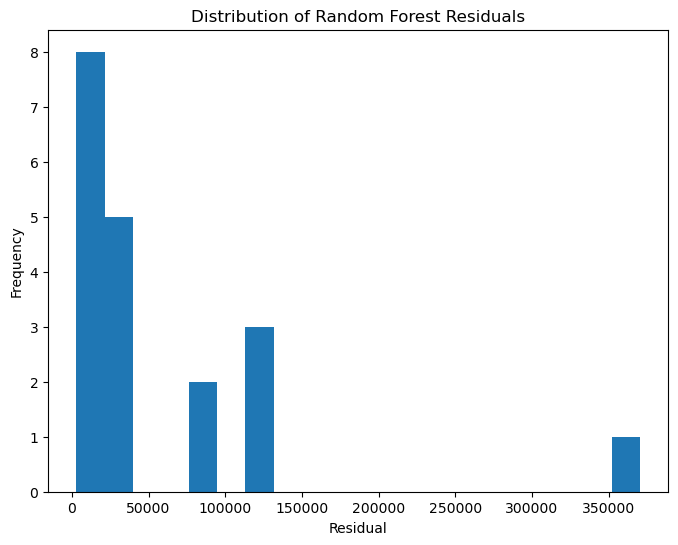

In [18]:
# Lets also look at the Error Distribution for the Random Forest model

plt.figure(figsize=(8,6))
plt.hist(preds["RF_Residuals"], bins=20)
plt.title("Distribution of Random Forest Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")

plt.savefig("../figures/charts/rf_residual_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


**📌 Why this matters**

The error distribution histogram provides insight into the systematic behavior of the Random Forest model’s errors.

The most notable feature is the strong right skew, meaning most residuals are positive. This confirms a consistent underprediction bias, the model regularly predicts lower values than what is actually observed.

There is no symmetry around zero, which further indicates the model is not well-centered and is biased rather than simply noisy. In addition, the presence of a long right tail shows that the model occasionally makes very large errors, especially during high-sales periods. These rare but significant misses represent business risk because they could lead to understocking, missed revenue targets, or poor planning decisions.

**Conclusion:** The model is directionally biased and occasionally fails badly at high sales volumes, which limits its use for high-stakes forecasting without further improvement.

In [19]:
# lets save the evaluation artifacts

preds.to_csv("../data/processed/evaluation_results.csv", index=False)